In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import scipy
import matplotlib.pyplot as plt

import sklearn
from sklearn.linear_model import LinearRegression,LogisticRegression,Lasso,Ridge,ElasticNet
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB,MultinomialNB

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
data=pd.read_csv("Glass_ide.csv")

In [4]:
data

,1,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.00.1,1.1
0,2,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.00,1
1,3,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.00,1
2,4,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.00,1
3,5,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.00,1
4,6,1.51596,12.79,3.61,1.62,72.97,0.64,8.07,0.00,0.26,1
...,...,...,...,...,...,...,...,...,...,...,...
208,210,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.00,7
209,211,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.00,7
210,212,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.00,7
211,213,1.51651,14.38,0.00,1.94,73.61,0.00,8.48,1.57,0.00,7


In [22]:
df=pd.DataFrame(data=data)

In [23]:
df.head()

,1,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.00.1,1.1
0,2,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.00,1
1,3,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.00,1
2,4,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.00,1
3,5,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.00,1
4,6,1.51596,12.79,3.61,1.62,72.97,0.64,8.07,0.0,0.26,1


In [24]:
df.tail()

,1,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.00.1,1.1
208,210,1.51623,14.14,0.0,2.88,72.61,0.08,9.18,1.06,0.0,7
209,211,1.51685,14.92,0.0,1.99,73.06,0.00,8.40,1.59,0.0,7
210,212,1.52065,14.36,0.0,2.02,73.42,0.00,8.44,1.64,0.0,7
211,213,1.51651,14.38,0.0,1.94,73.61,0.00,8.48,1.57,0.0,7
212,214,1.51711,14.23,0.0,2.08,73.36,0.00,8.62,1.67,0.0,7


In [25]:
df.sample()

,1,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.00.1,1.1
189,191,1.51613,13.88,1.78,1.79,73.1,0.0,8.67,0.76,0.0,7


In [26]:
df.shape

(213, 11)

In [27]:
df.dtypes

1            int64
1.52101    float64
13.64      float64
4.49       float64
1.10       float64
71.78      float64
0.06       float64
8.75       float64
0.00       float64
0.00.1     float64
1.1          int64
dtype: object

In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 213 entries, 0 to 212
Data columns (total 11 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   1        213 non-null    int64  
 1   1.52101  213 non-null    float64
 2   13.64    213 non-null    float64
 3   4.49     213 non-null    float64
 4   1.10     213 non-null    float64
 5   71.78    213 non-null    float64
 6   0.06     213 non-null    float64
 7   8.75     213 non-null    float64
 8   0.00     213 non-null    float64
 9   0.00.1   213 non-null    float64
 10  1.1      213 non-null    int64  
dtypes: float64(9), int64(2)
memory usage: 18.4 KB


In [29]:
df.isnull().sum()

1          0
1.52101    0
13.64      0
4.49       0
1.10       0
71.78      0
0.06       0
8.75       0
0.00       0
0.00.1     0
1.1        0
dtype: int64

<AxesSubplot:>

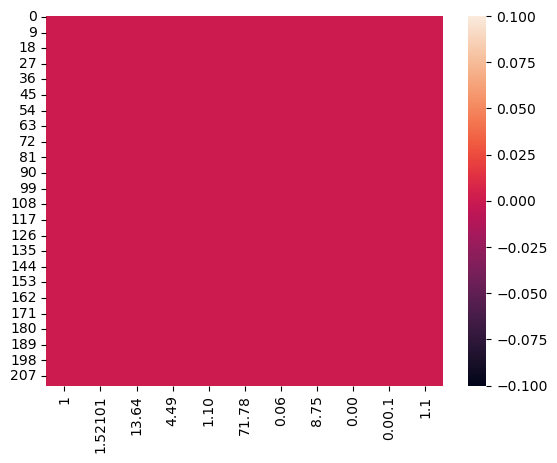

In [30]:
sns.heatmap(df.isnull())

In [31]:
df.describe()

,1,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.00.1,1.1
count,213.000000,213.000000,213.000000,213.000000,213.000000,213.000000,213.000000,213.000000,213.000000,213.000000,213.000000
mean,108.000000,1.518353,13.406761,2.676056,1.446526,72.655023,0.499108,8.957934,0.175869,0.057277,2.788732
std,61.631972,0.003039,0.818371,1.440453,0.499882,0.774052,0.653035,1.426435,0.498245,0.097589,2.105130
min,2.000000,1.511150,10.730000,0.000000,0.290000,69.810000,0.000000,5.430000,0.000000,0.000000,1.000000
25%,55.000000,1.516520,12.900000,2.090000,1.190000,72.280000,0.130000,8.240000,0.000000,0.000000,1.000000
50%,108.000000,1.517680,13.300000,3.480000,1.360000,72.790000,0.560000,8.600000,0.000000,0.000000,2.000000
75%,161.000000,1.519150,13.830000,3.600000,1.630000,73.090000,0.610000,9.180000,0.000000,0.100000,3.000000
max,214.000000,1.533930,17.380000,3.980000,3.500000,75.410000,6.210000,16.190000,3.150000,0.510000,7.000000


key observations-

1- No skewness in datasets as mean is not more then median(50%).

2- outliers are present in data(df) as there is  difference in 75% and max in 1 column

In [15]:
df.skew()

1          0.000000
1.52101    1.639658
13.64      0.457318
4.49      -1.154323
1.10       0.900017
71.78     -0.744546
0.06       6.549276
8.75       2.040591
0.00       3.406749
0.00.1     1.747173
1.1        1.108861
dtype: float64

<AxesSubplot:xlabel='1', ylabel='Density'>

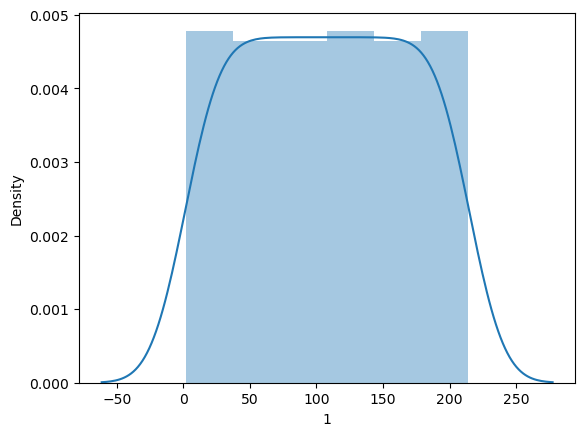

In [17]:
sns.distplot(df["1"])

<AxesSubplot:xlabel='1.52101', ylabel='Density'>

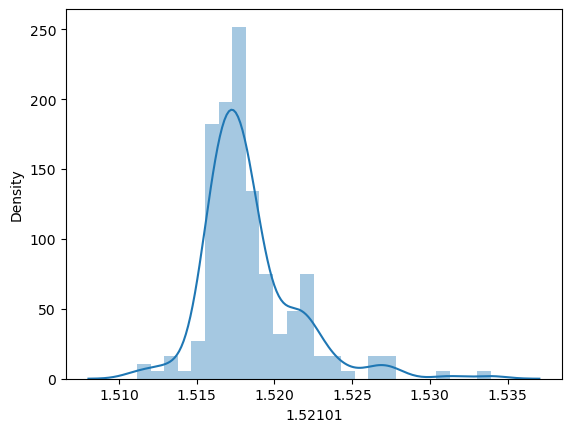

In [32]:
sns.distplot(df["1.52101"])

<AxesSubplot:xlabel='13.64', ylabel='Density'>

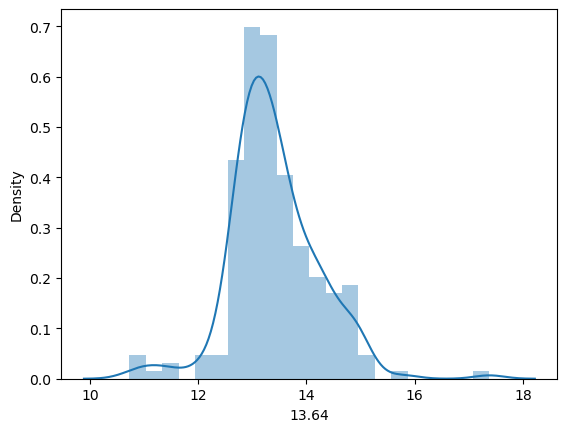

In [33]:
sns.distplot(df["13.64"])

<AxesSubplot:xlabel='8.75', ylabel='Density'>

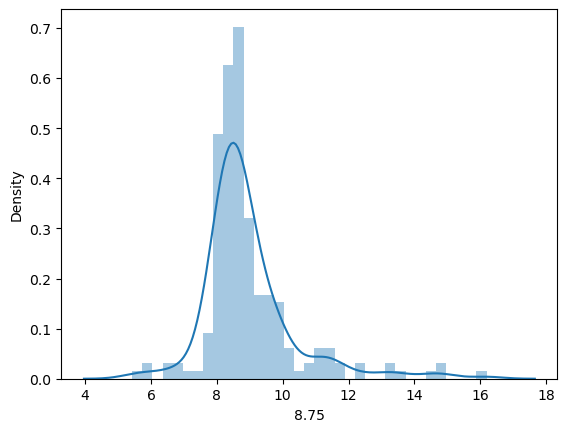

In [35]:
sns.distplot(df["8.75"])

From this above uni-varient analysis we get to know that there is no skewness present in dataset(df)

Removing the outliers

In [36]:
from scipy.stats import zscore

In [37]:
z=np.abs(zscore(df))

In [38]:
z

,1,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.00.1,1.1
0,1.723938,0.245101,0.591880,0.642937,0.173500,0.097091,0.029329,0.792599,0.353808,0.588301,0.851703
1,1.707675,0.716826,0.150946,0.608144,0.187433,0.433777,0.167472,0.827734,0.353808,0.588301,0.851703
2,1.691411,0.228607,0.240996,0.705564,0.313863,0.058303,0.108813,0.518546,0.353808,0.588301,0.851703
3,1.675147,0.307777,0.167507,0.656854,0.414122,0.550322,0.078115,0.623951,0.353808,0.588301,0.851703
4,1.658884,0.789399,0.755419,0.649895,0.347848,0.407878,0.216258,0.623951,0.353808,2.082200,0.851703
...,...,...,...,...,...,...,...,...,...,...,...
208,1.658884,0.700332,0.898085,1.862164,2.874379,0.058303,0.643296,0.156046,1.778672,0.588301,2.005192
209,1.675147,0.495808,1.853443,1.862164,1.089766,0.524423,0.766090,0.392060,2.844912,0.588301,2.005192
210,1.691411,0.757727,1.167545,1.862164,1.149921,0.990604,0.766090,0.363952,2.945501,0.588301,2.005192
211,1.707675,0.607966,1.192041,1.862164,0.989506,1.236644,0.766090,0.335844,2.804676,0.588301,2.005192


In [39]:
threashold=3
print(np.where(z>3))

(array([104, 105, 105, 105, 105, 105, 106, 106, 106, 109, 110, 111, 111,
       130, 144, 161, 162, 162, 162, 170, 170, 171, 171, 173, 183, 183,
       187, 188, 200, 200, 202, 206, 212], dtype=int64), array([7, 1, 2, 5, 7, 8, 1, 5, 7, 7, 7, 1, 7, 7, 9, 9, 4, 5, 8, 4, 6, 4,
       6, 9, 2, 5, 5, 8, 5, 6, 8, 8, 8], dtype=int64))


In [41]:
df_new=df[(z<3).all(axis=1)]

In [42]:
df_new

,1,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.00.1,1.1
0,2,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.00,1
1,3,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.00,1
2,4,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.00,1
3,5,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.00,1
4,6,1.51596,12.79,3.61,1.62,72.97,0.64,8.07,0.00,0.26,1
...,...,...,...,...,...,...,...,...,...,...,...
207,209,1.51640,14.37,0.00,2.74,72.85,0.00,9.45,0.54,0.00,7
208,210,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.00,7
209,211,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.00,7
210,212,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.00,7


In [43]:
df_new.shape

(193, 11)

In [44]:
df=df_new

In [45]:
df.shape

(193, 11)

In [48]:
x=df.iloc[:,0:-1]

In [49]:
x.shape

(193, 10)

In [51]:
y=df.iloc[:,-1]

In [52]:
y.shape

(193,)

In [53]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=.30,random_state=48)

In [54]:
xtrain.shape

(135, 10)

In [55]:
ytrain.shape

(135,)

In [57]:
lg=LogisticRegression()

In [58]:
lg

LogisticRegression()

In [59]:
lg.fit(xtrain,ytrain)

LogisticRegression()

In [61]:
lg.score(xtrain,ytrain)

1.0

In [62]:
lpred=lg.predict(xtest)

In [63]:
print("Accuracy score = ",accuracy_score(ytest,lpred))

Accuracy score =  1.0


In [64]:
print("Confussion_matrix = ",confusion_matrix(ytest,lpred))

Confussion_matrix =  [[15  0  0  0  0  0]
 [ 0 23  0  0  0  0]
 [ 0  0  5  0  0  0]
 [ 0  0  0  2  0  0]
 [ 0  0  0  0  2  0]
 [ 0  0  0  0  0 11]]


In [68]:
print("Classification report = ",classification_report(ytest,lpred))

Classification report =                precision    recall  f1-score   support

           1       1.00      1.00      1.00        15
           2       1.00      1.00      1.00        23
           3       1.00      1.00      1.00         5
           5       1.00      1.00      1.00         2
           6       1.00      1.00      1.00         2
           7       1.00      1.00      1.00        11

    accuracy                           1.00        58
   macro avg       1.00      1.00      1.00        58
weighted avg       1.00      1.00      1.00        58



In [69]:
#lets take the example
p=np.array([2,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.00])

In [72]:
p1=p.reshape(1,-1)

In [73]:
lg.predict(p1)

array([1], dtype=int64)

 The model is predicting the Right Glass Type.
 hence the model is working fine